# Understanding and visualizing the dataset

This notebook aims to help understand and visualize the dataset.

In [2]:
import math

import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('datasets/tmdb-15000-movies.csv', lineterminator='\n')

df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_year'] = df['release_date'].dt.year
df['release_month'] = df['release_date'].dt.month
df['release_day'] = df['release_date'].dt.day

df = df[df['original_language'] == 'en']
df = df[df['popularity'] <= 100]
df = df[df['vote_count'] >= 100]

df['vote_count_log10'] = df['vote_count'].apply(lambda x: math.log10(x))

def make_plot(df: pd.DataFrame, x: str, y: str, title: str | None = None):
    plt.scatter(df[x], df[y])
    plt.xlabel(x)
    plt.ylabel(y)
    if title:
        plt.title(title)
    plt.show()

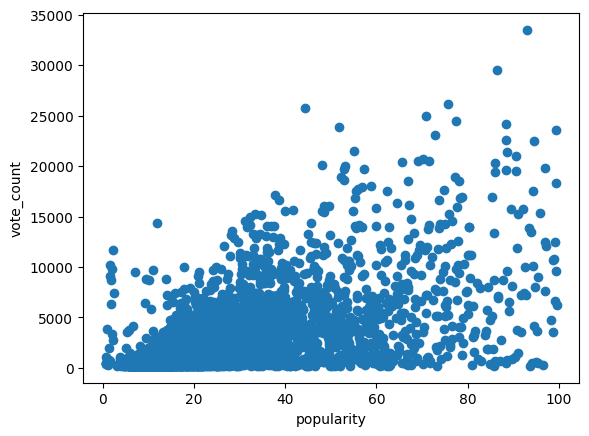

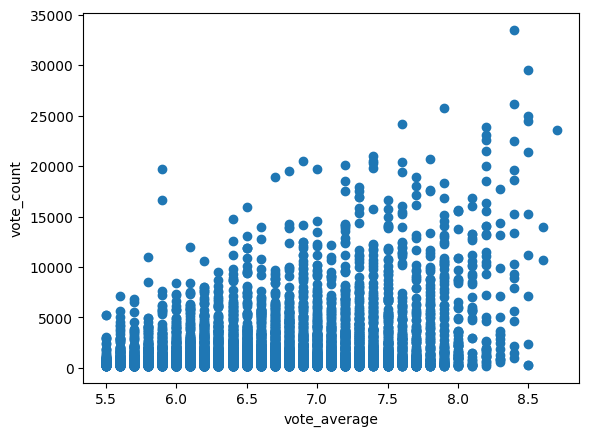

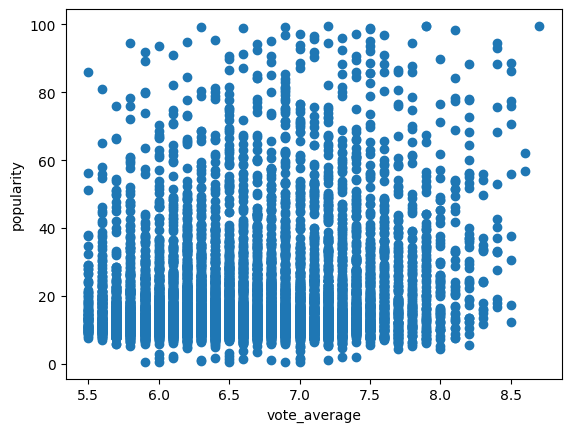

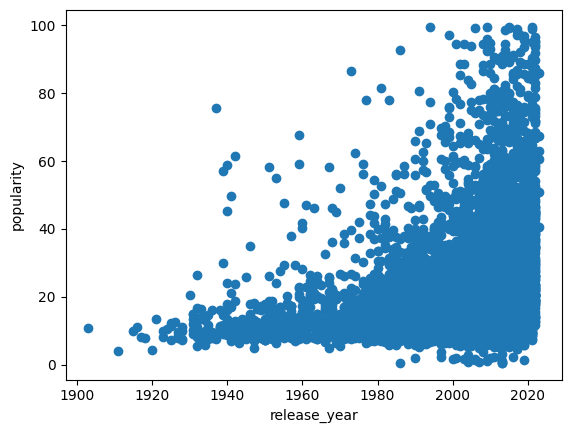

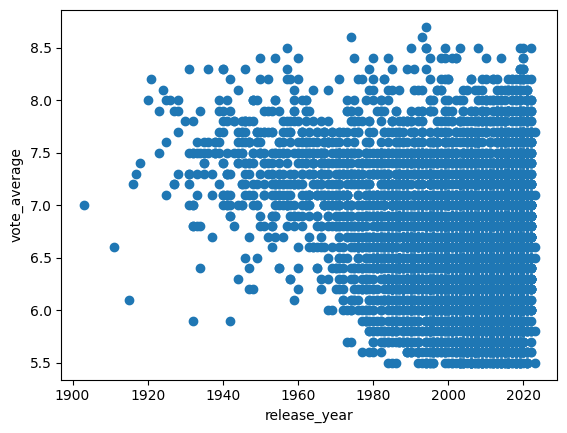

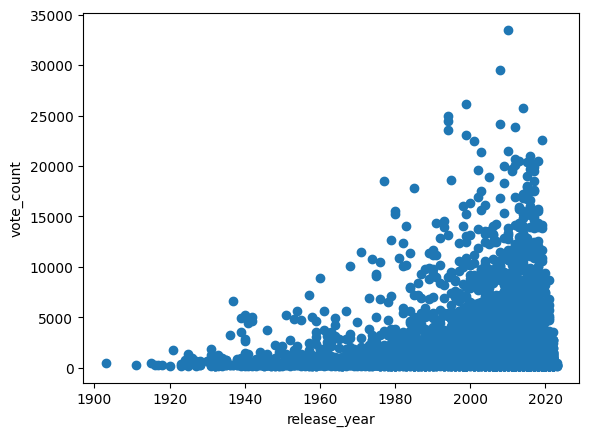

In [3]:
make_plot(df, 'popularity', 'vote_count')
make_plot(df, 'vote_average', 'vote_count')
make_plot(df, 'vote_average', 'popularity')

make_plot(df, 'release_year', 'popularity')
make_plot(df, 'release_year', 'vote_average')
make_plot(df, 'release_year', 'vote_count')

In [4]:
from sklearn.preprocessing import MultiLabelBinarizer

import json

df['genres_list'] = df['genres'].fillna('[]')

# Step 1: Parse JSON into Python list
df['genres_list'] = df['genres'].apply(lambda x: json.loads(x.replace("'", '"')))

# Step 2: Convert Python list into list of genre names
df['genre_names'] = df['genres_list'].apply(lambda x: [i['name'].lower().replace(' ', '_') for i in x])

# Step 3: Initialize MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Step 4: Transform the genres
genres_encoded = mlb.fit_transform(df['genre_names'])

# Get the genre names
genre_names = mlb.classes_

# Step 5: Create a DataFrame
genre_columns = ["genre_"+name for name in genre_names]
genres_df = pd.DataFrame(genres_encoded, columns=genre_columns)

# Step 6: Concatenate the one-hot encoded genres back to the original dataframe
df = pd.concat([df, genres_df], axis=1)

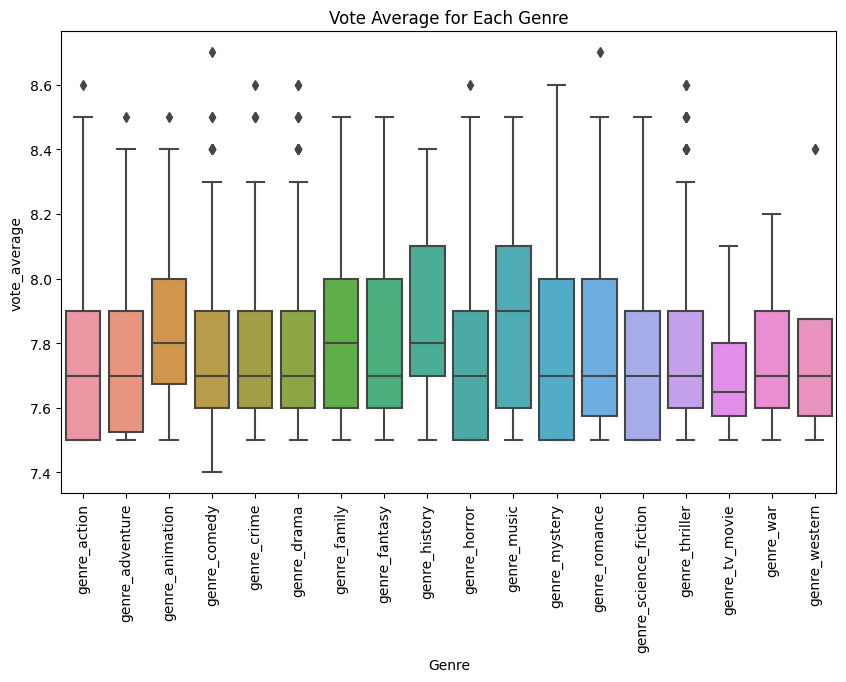

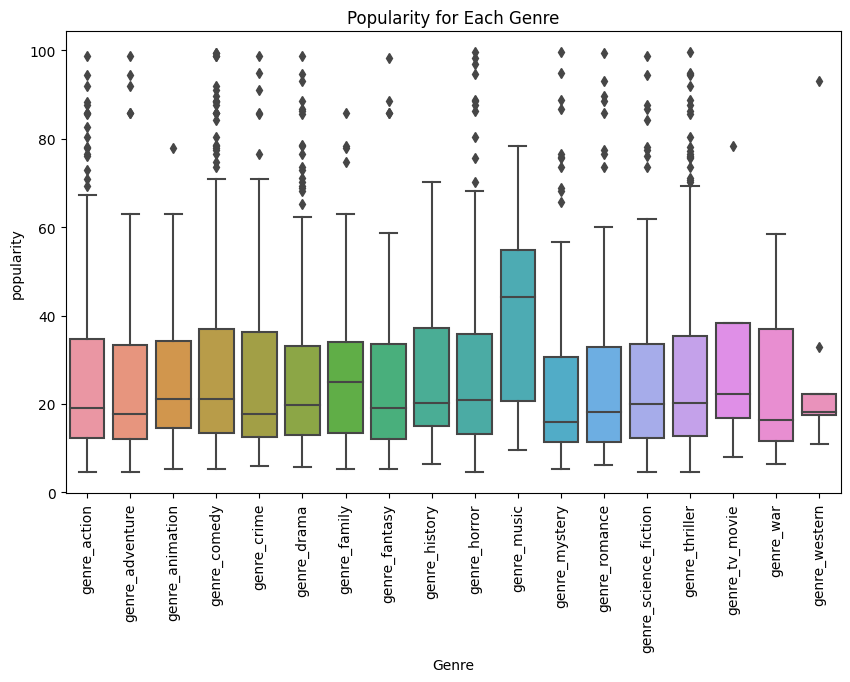

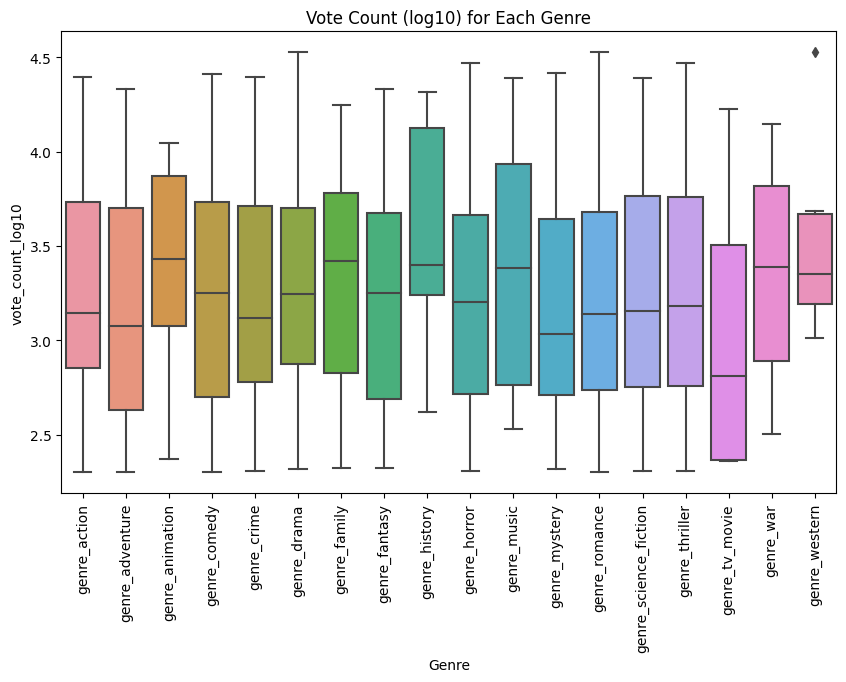

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Melt the dataframe to have genre and value columns
df_melted = df.melt(id_vars=['vote_average', 'popularity', 'vote_count_log10'], 
                    value_vars=genre_columns,
                    var_name='Genre', 
                    value_name='Value')

# Filter out rows where Value is 0
df_melted = df_melted[df_melted['Value'] == 1]

# Plot vote_average for each genre
plt.figure(figsize=(10,6))
sns.boxplot(data=df_melted, x='Genre', y='vote_average')
plt.xticks(rotation=90)
plt.title('Vote Average for Each Genre')
plt.show()

# Plot popularity for each genre
plt.figure(figsize=(10,6))
sns.boxplot(data=df_melted, x='Genre', y='popularity')
plt.xticks(rotation=90)
plt.title('Popularity for Each Genre')
plt.show()

# Plot vote_count_log10 for each genre
plt.figure(figsize=(10,6))
sns.boxplot(data=df_melted, x='Genre', y='vote_count_log10')
plt.xticks(rotation=90)
plt.title('Vote Count (log10) for Each Genre')
plt.show()

# # Plot release_year for each genre
# plt.figure(figsize=(10,6))
# sns.boxplot(data=df_melted, x='Genre', y='release_year')
# plt.xticks(rotation=90)
# plt.title('Release Year for Each Genre')
# plt.show()

In [6]:
import json

from sklearn.preprocessing import MultiLabelBinarizer

df['keywords'] = df['keywords'].fillna('[]')

# Step 1: Parse JSON into Python list
df['keywords_list'] = df['keywords'].apply(lambda x: eval(x))

# Step 2: Convert Python list into list of keyword names
df['keyword_names'] = df['keywords_list'].apply(lambda x: [i.lower().replace(' ', '_').replace(',', '') for i in x])

# Step 3: Initialize MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Step 4: Transform the keywords
keywords_encoded = mlb.fit_transform(df['keyword_names'])

# Get the keyword names
keyword_names = mlb.classes_

# Step 5: Create a DataFrame
keyword_columns = ["keyword_"+name for name in keyword_names]
keywords_df = pd.DataFrame(keywords_encoded, columns=keyword_columns)

# Step 6: Concatenate the one-hot encoded keywords back to the original dataframe
df = pd.concat([df, keywords_df], axis=1)

In [7]:
keyword_occurrences = df[keyword_columns].sum().sort_values(ascending=False)
print(keyword_occurrences.head(20))

top_20_keywords = keyword_occurrences.head(20).index
top_50_keywords = keyword_occurrences.head(50).index

keyword_based_on_novel_or_book       891.0
keyword_murder                       528.0
keyword_woman_director               432.0
keyword_new_york_city                373.0
keyword_based_on_true_story          338.0
keyword_duringcreditsstinger         331.0
keyword_sequel                       284.0
keyword_revenge                      265.0
keyword_biography                    259.0
keyword_los_angeles_california       222.0
keyword_friendship                   204.0
keyword_parent_child_relationship    203.0
keyword_high_school                  202.0
keyword_remake                       198.0
keyword_based_on_comic               198.0
keyword_london_england               193.0
keyword_dystopia                     193.0
keyword_aftercreditsstinger          191.0
keyword_police                       188.0
keyword_musical                      180.0
dtype: float64


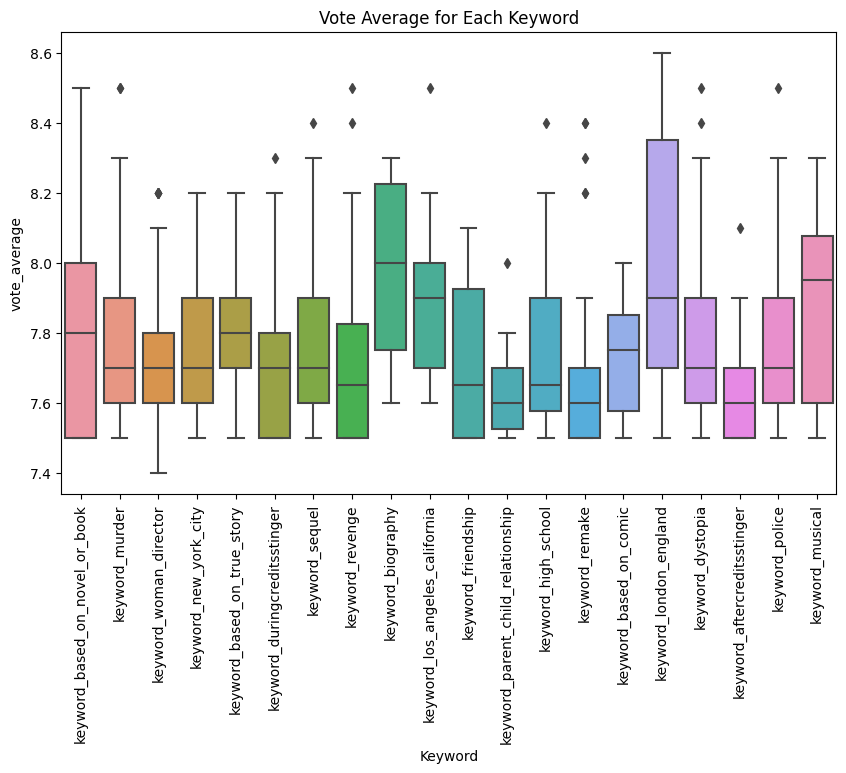

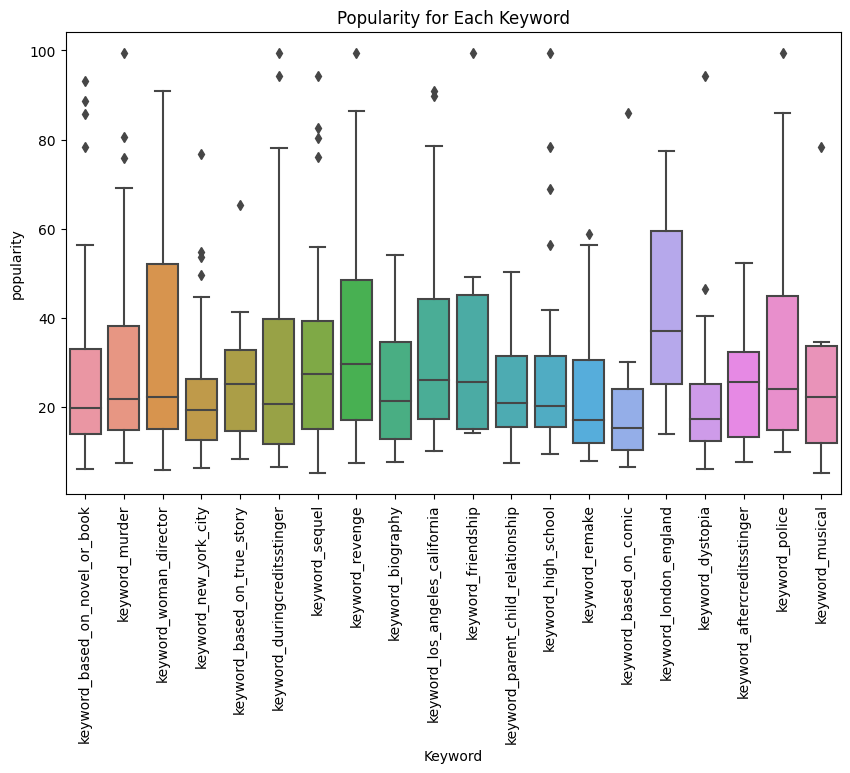

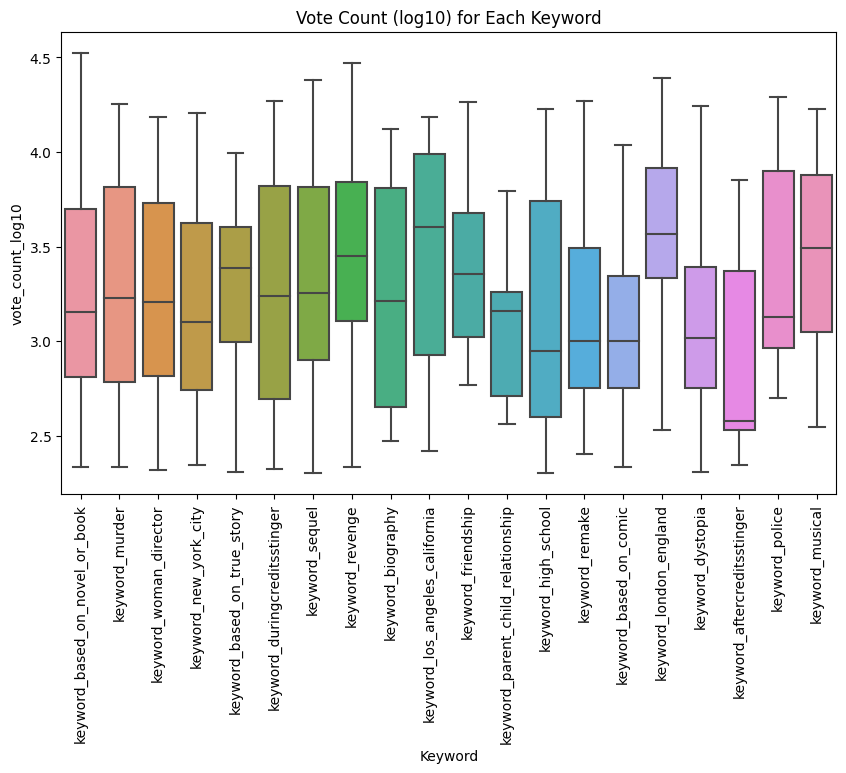

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Melt the dataframe to have keyword and value columns
df_melted = df.melt(id_vars=['vote_average', 'popularity', 'vote_count_log10'], 
                    value_vars=top_20_keywords,
                    var_name='Keyword', 
                    value_name='Value')

# Filter out rows where Value is 0
df_melted = df_melted[df_melted['Value'] == 1]

# Plot vote_average for each keyword
plt.figure(figsize=(10,6))
sns.boxplot(data=df_melted, x='Keyword', y='vote_average')
plt.xticks(rotation=90)
plt.title('Vote Average for Each Keyword')
plt.show()

# Plot popularity for each keyword
plt.figure(figsize=(10,6))
sns.boxplot(data=df_melted, x='Keyword', y='popularity')
plt.xticks(rotation=90)
plt.title('Popularity for Each Keyword')
plt.show()

# Plot vote_count_log10 for each keyword
plt.figure(figsize=(10,6))
sns.boxplot(data=df_melted, x='Keyword', y='vote_count_log10')
plt.xticks(rotation=90)
plt.title('Vote Count (log10) for Each Keyword')
plt.show()

# # Plot release_year for each keyword
# plt.figure(figsize=(10,6))
# sns.boxplot(data=df_melted, x='Keyword', y='release_year')
# plt.xticks(rotation=90)
# plt.title('Release Year for Each Keyword')
# plt.show()

In [9]:
from sklearn.model_selection import train_test_split

X_genres = df[genre_columns]
X_genres = X_genres.fillna(0)

X_keywords = df[top_50_keywords]
X_keywords = X_keywords.fillna(0)

Y_vote_average = df['vote_average']
Y_vote_average = Y_vote_average.fillna(0)

Y_popularity = df['popularity']
Y_popularity = Y_popularity.fillna(0)

(X_genres_train, 
 X_genres_test, 
 X_keywords_train, 
 X_keywords_test, 
 Y_vote_average_train, 
 Y_vote_average_test,
 Y_popularity_train,
 Y_popularity_test) = train_test_split(X_genres, 
                                       X_keywords, 
                                       Y_vote_average, 
                                       Y_popularity,
                                       test_size=0.2, 
                                       random_state=42)

In [10]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

mlr_genres = LinearRegression()

mlr_genres.fit(X_genres_train, Y_vote_average_train)

y_pred = mlr_genres.predict(X_genres_test)

mse_genres = mean_squared_error(Y_vote_average_test, y_pred)
rmse_genres = np.sqrt(mse_genres)

print("Root Mean Squared Error (genres):", rmse_genres)

Root Mean Squared Error (genres): 2.653747937192215


In [11]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

mlr_keywords = LinearRegression()

mlr_keywords.fit(X_keywords_train, Y_vote_average_train)

y_pred = mlr_keywords.predict(X_keywords_test)

mse_keywords = mean_squared_error(Y_vote_average_test, y_pred)
rmse_keywords = np.sqrt(mse_keywords)

print("Root Mean Squared Error (keywords):", rmse_keywords)

Root Mean Squared Error (keywords): 3.0223757756886642


In [12]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

mlr_genres_popularity = LinearRegression()

mlr_genres_popularity.fit(X_genres_train, Y_popularity_train)

y_pred = mlr_genres_popularity.predict(X_genres_test)

mse_genres_popularity = mean_squared_error(Y_popularity_test, y_pred)
rmse_genres_popularity = np.sqrt(mse_genres_popularity)

print("Root Mean Squared Error (genres_popularity):", rmse_genres)

Root Mean Squared Error (genres_popularity): 2.653747937192215


In [13]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

mlr_genres_keywords = LinearRegression()

X_genres_and_keywords_train = pd.concat([X_genres_train, X_keywords_train], axis=1)
X_genres_and_keywords_test = pd.concat([X_genres_test, X_keywords_test], axis=1)

mlr_genres_keywords.fit(X_genres_and_keywords_train, Y_vote_average_train)

y_pred = mlr_genres_keywords.predict(X_genres_and_keywords_test)

mse_genres_keywords = mean_squared_error(Y_vote_average_test, y_pred)
rmse_genres_keywords = np.sqrt(mse_genres_keywords)

print("Root Mean Squared Error (genres_keywords):", rmse_genres_keywords)

Root Mean Squared Error (genres_keywords): 2.6285844376159933
